Importing the libraries.

In [1]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime
now = datetime.datetime.now()
date = str(now).split(' ')[0]
time_str = f'{date} 05:30:00'
time = datetime.datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
curr_time = round(time.timestamp())

In [3]:
periods = {
   '%5ENSEI':{
        'period1':1189987200,
        'period2':curr_time,
    },
   'RELIANCE.NS':{
      'period1':820454400,
      'period2':curr_time,
   }
}

Loading the dataset.

In [4]:
!pip install fake_useragent
import requests
from fake_useragent import UserAgent

def download_file(stock_name):
    global curr_time
    ua_str = UserAgent().chrome
    file_url = f"https://query1.finance.yahoo.com/v7/finance/download/{stock_name}?period1={periods[stock_name]['period1']}&period2={curr_time}&interval=1d&events=history&includeAdjustedClose=true"
    r = requests.get(file_url, headers={'User-Agent':ua_str})

    with open (stock_name+'.csv', 'wb') as f:
        f.write(r.content)

In [5]:
stock_name = '%5ENSEI'
# stock_name = 'RELIANCE.NS'
download_file(stock_name)

In [6]:
df = pd.read_csv(stock_name+'.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4036,2024-01-19,21615.199219,21670.599609,21575.000000,21622.400391,21622.400391,343100.0
4037,2024-01-22,NaN,NaN,NaN,NaN,NaN,NaN
4038,2024-01-23,21716.699219,21750.250000,21192.599609,21238.800781,21238.800781,449700.0
4039,2024-01-24,21185.250000,21482.349609,21137.199219,21453.949219,21453.949219,407500.0
4040,2024-01-25,21454.599609,21459.000000,21247.050781,21259.550781,21259.550781,0.0


In [7]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index = df['Date']
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2024-01-19,2024-01-19,21615.199219,21670.599609,21575.000000,21622.400391,21622.400391,343100.0
2024-01-22,2024-01-22,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-23,2024-01-23,21716.699219,21750.250000,21192.599609,21238.800781,21238.800781,449700.0
2024-01-24,2024-01-24,21185.250000,21482.349609,21137.199219,21453.949219,21453.949219,407500.0
2024-01-25,2024-01-25,21454.599609,21459.000000,21247.050781,21259.550781,21259.550781,0.0


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4.009000e+03
mean,9345.381729,9397.059054,9278.512937,9339.202736,9339.202736,1.989814e+05
std,4632.808931,4642.690299,4614.203568,4629.610957,4629.610957,2.109245e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5513.750000,5553.000000,5472.149902,5520.799805,5520.799805,0.000000e+00
50%,8232.450195,8279.200195,8185.149902,8235.450195,8235.450195,1.704000e+05
75%,11515.400391,11568.900391,11442.250000,11504.950195,11504.950195,2.745000e+05
max,22080.500000,22124.150391,21969.800781,22097.449219,22097.449219,1.811000e+06


In [9]:
dataset = pd.DataFrame(df[['Close']])
dataset.tail()

,Close
Date,
2024-01-19,21622.400391
2024-01-22,NaN
2024-01-23,21238.800781
2024-01-24,21453.949219
2024-01-25,21259.550781


Analyzing the field "close" of the dataset.

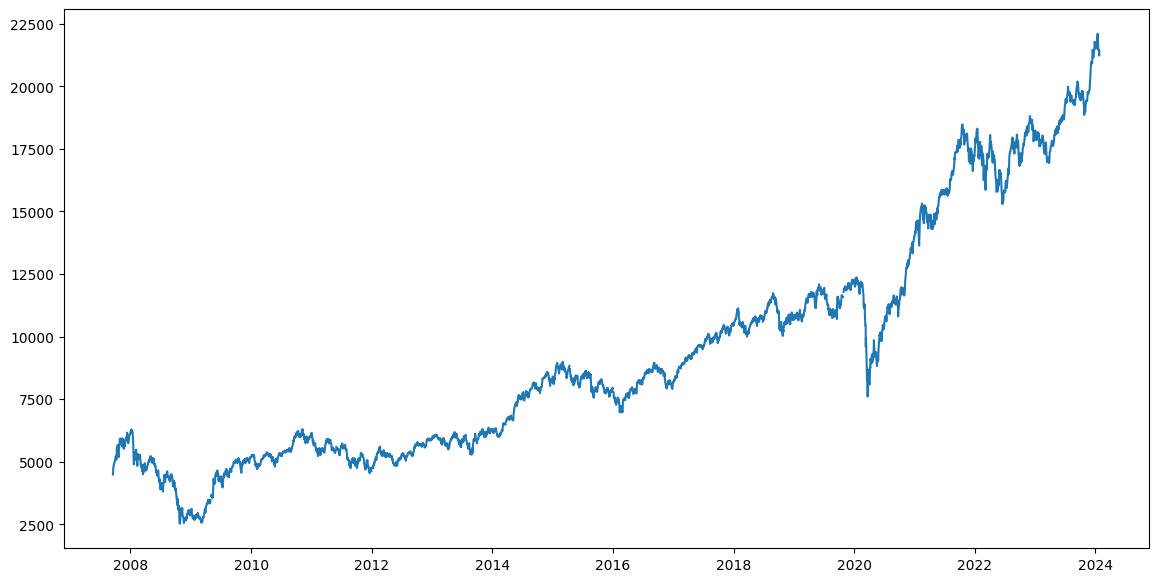

In [10]:
plt.figure(figsize=(14,7))
plt.plot(dataset,label='Close Price history')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4041 entries, 2007-09-17 to 2024-01-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4009 non-null   float64
dtypes: float64(1)
memory usage: 63.1 KB
